In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.utils as vutils
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os

In [13]:
# hyperparameters
image_size = 64
batch_size = 128
nz = 100  # Size of latent vector
lr = 0.0002
beta1 = 0.5
epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# transform
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# dataset
class CatsDataset(Dataset):
    def __init__(self, root, transform=None):
        self.root = root
        self.transform = transform
        self.images = [os.path.join(root, f) for f in os.listdir(root) if f.endswith(('png', 'jpg', 'jpeg'))]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = Image.open(self.images[index]).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, 0

# load dataset
dataset = CatsDataset(root="cats", transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [15]:
# generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(nz, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )
    def forward(self, x):
        return self.main(x)

# discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.main(x)


In [17]:
# initialization of models
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# loss and optimizers
criterion = nn.BCELoss()
optimizerG = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerD = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, 0.999))

Epoch [1/100] Loss D: 0.1010, Loss G: 12.3487


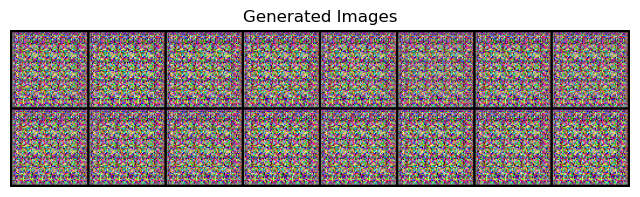

Epoch [2/100] Loss D: 0.1617, Loss G: 7.5552
Epoch [3/100] Loss D: 1.1652, Loss G: 4.9493
Epoch [4/100] Loss D: 0.6798, Loss G: 2.5395
Epoch [5/100] Loss D: 0.5870, Loss G: 3.9052
Epoch [6/100] Loss D: 0.3560, Loss G: 3.3300
Epoch [7/100] Loss D: 0.7780, Loss G: 4.3764
Epoch [8/100] Loss D: 0.4116, Loss G: 3.5716
Epoch [9/100] Loss D: 0.6949, Loss G: 5.3855
Epoch [10/100] Loss D: 0.2615, Loss G: 3.8415
Epoch [11/100] Loss D: 0.3576, Loss G: 3.8906


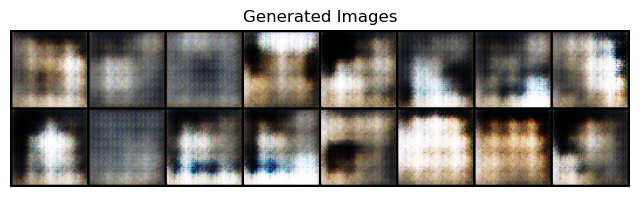

Epoch [12/100] Loss D: 0.5074, Loss G: 2.5712
Epoch [13/100] Loss D: 0.8576, Loss G: 4.3511
Epoch [14/100] Loss D: 0.6089, Loss G: 3.4436
Epoch [15/100] Loss D: 0.3331, Loss G: 3.1921
Epoch [16/100] Loss D: 0.3963, Loss G: 3.7143
Epoch [17/100] Loss D: 0.6905, Loss G: 4.4003
Epoch [18/100] Loss D: 0.6334, Loss G: 4.5605
Epoch [19/100] Loss D: 0.7175, Loss G: 5.0001
Epoch [20/100] Loss D: 0.3819, Loss G: 3.1911
Epoch [21/100] Loss D: 0.6398, Loss G: 4.0815


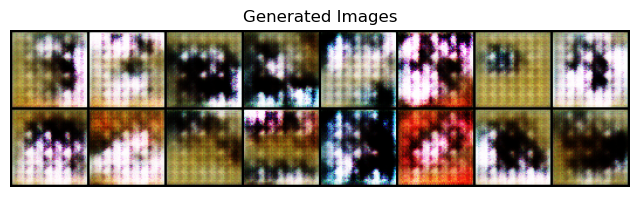

Epoch [22/100] Loss D: 0.5023, Loss G: 2.6203
Epoch [23/100] Loss D: 0.1732, Loss G: 3.6684
Epoch [24/100] Loss D: 0.3679, Loss G: 4.2676
Epoch [25/100] Loss D: 0.6034, Loss G: 3.7017
Epoch [26/100] Loss D: 0.5430, Loss G: 2.8398
Epoch [27/100] Loss D: 0.2575, Loss G: 5.5636
Epoch [28/100] Loss D: 0.6075, Loss G: 2.7485
Epoch [29/100] Loss D: 0.3494, Loss G: 3.6605
Epoch [30/100] Loss D: 0.6700, Loss G: 4.3225
Epoch [31/100] Loss D: 1.7489, Loss G: 2.3274


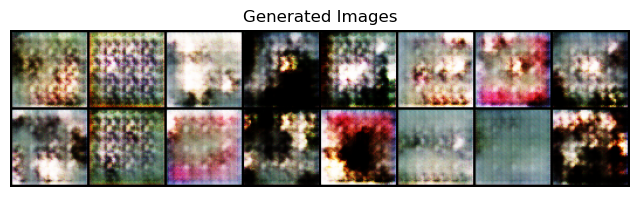

Epoch [32/100] Loss D: 0.7005, Loss G: 1.8953
Epoch [33/100] Loss D: 1.8575, Loss G: 0.3222
Epoch [34/100] Loss D: 0.4820, Loss G: 4.2925
Epoch [35/100] Loss D: 0.8821, Loss G: 7.1739
Epoch [36/100] Loss D: 1.1697, Loss G: 1.6378
Epoch [37/100] Loss D: 0.5777, Loss G: 2.7169
Epoch [38/100] Loss D: 1.7617, Loss G: 7.8782
Epoch [39/100] Loss D: 0.7432, Loss G: 2.5702
Epoch [40/100] Loss D: 1.0500, Loss G: 1.7095
Epoch [41/100] Loss D: 0.4397, Loss G: 5.1131


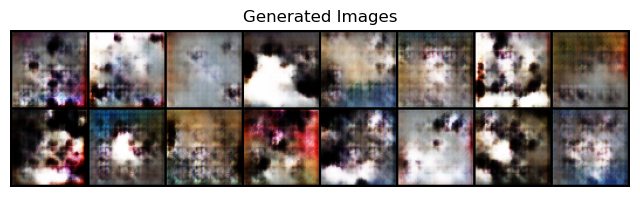

Epoch [42/100] Loss D: 0.2476, Loss G: 2.1932
Epoch [43/100] Loss D: 0.8653, Loss G: 1.5667
Epoch [44/100] Loss D: 0.7836, Loss G: 5.0944
Epoch [45/100] Loss D: 0.3416, Loss G: 3.9319
Epoch [46/100] Loss D: 0.8930, Loss G: 5.2576
Epoch [47/100] Loss D: 0.5337, Loss G: 4.4953
Epoch [48/100] Loss D: 0.9427, Loss G: 1.7199
Epoch [49/100] Loss D: 0.5735, Loss G: 5.0515
Epoch [50/100] Loss D: 0.3171, Loss G: 4.3111
Epoch [51/100] Loss D: 0.5947, Loss G: 4.3595


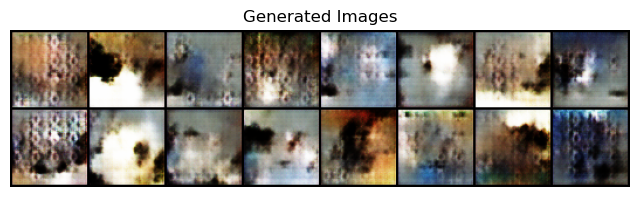

Epoch [52/100] Loss D: 0.5494, Loss G: 1.4261
Epoch [53/100] Loss D: 0.4822, Loss G: 4.4593
Epoch [54/100] Loss D: 0.4374, Loss G: 3.8637
Epoch [55/100] Loss D: 0.3474, Loss G: 4.0539
Epoch [56/100] Loss D: 0.6868, Loss G: 3.6906
Epoch [57/100] Loss D: 0.3498, Loss G: 5.4619
Epoch [58/100] Loss D: 0.3820, Loss G: 4.4442
Epoch [59/100] Loss D: 0.6272, Loss G: 3.1081
Epoch [60/100] Loss D: 0.3534, Loss G: 2.8040
Epoch [61/100] Loss D: 0.2919, Loss G: 4.4967


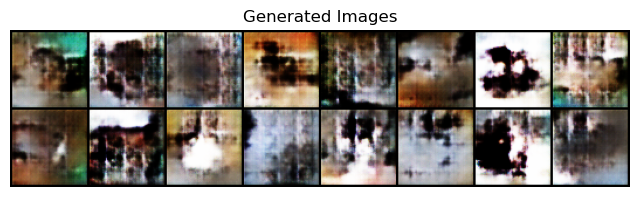

Epoch [62/100] Loss D: 0.7015, Loss G: 5.3564
Epoch [63/100] Loss D: 0.3727, Loss G: 5.8306
Epoch [64/100] Loss D: 0.2272, Loss G: 4.0270
Epoch [65/100] Loss D: 0.6947, Loss G: 2.8295
Epoch [66/100] Loss D: 0.2359, Loss G: 4.0376
Epoch [67/100] Loss D: 0.3317, Loss G: 4.4732
Epoch [68/100] Loss D: 0.6575, Loss G: 6.0515
Epoch [69/100] Loss D: 0.4837, Loss G: 4.6683
Epoch [70/100] Loss D: 0.4167, Loss G: 3.0216
Epoch [71/100] Loss D: 0.1857, Loss G: 4.1313


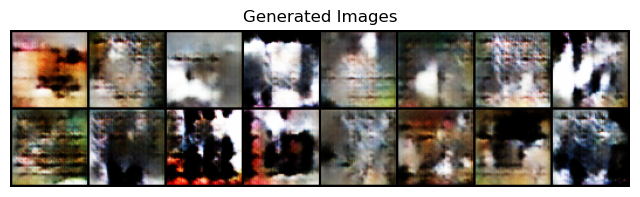

Epoch [72/100] Loss D: 0.7796, Loss G: 1.4890
Epoch [73/100] Loss D: 0.2643, Loss G: 3.3594
Epoch [74/100] Loss D: 0.2471, Loss G: 3.8761
Epoch [75/100] Loss D: 0.5386, Loss G: 4.9188
Epoch [76/100] Loss D: 0.5757, Loss G: 2.8766
Epoch [77/100] Loss D: 0.2551, Loss G: 4.1237
Epoch [78/100] Loss D: 0.3524, Loss G: 4.5146
Epoch [79/100] Loss D: 0.5658, Loss G: 2.3542
Epoch [80/100] Loss D: 0.3719, Loss G: 2.8274
Epoch [81/100] Loss D: 0.0916, Loss G: 5.5757


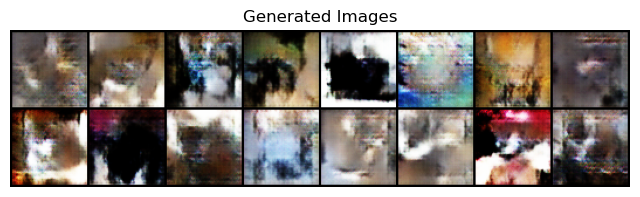

Epoch [82/100] Loss D: 0.9807, Loss G: 8.4853
Epoch [83/100] Loss D: 0.5302, Loss G: 2.2914
Epoch [84/100] Loss D: 0.3548, Loss G: 2.3592
Epoch [85/100] Loss D: 0.2650, Loss G: 2.3266
Epoch [86/100] Loss D: 0.3672, Loss G: 5.6685
Epoch [87/100] Loss D: 0.6244, Loss G: 1.4537
Epoch [88/100] Loss D: 0.4558, Loss G: 2.2906
Epoch [89/100] Loss D: 0.3700, Loss G: 5.7904
Epoch [90/100] Loss D: 0.3585, Loss G: 4.3228
Epoch [91/100] Loss D: 0.3449, Loss G: 3.9126


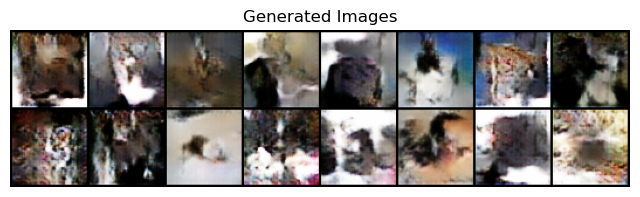

Epoch [92/100] Loss D: 0.4042, Loss G: 3.6897
Epoch [93/100] Loss D: 0.4300, Loss G: 6.8720
Epoch [94/100] Loss D: 2.1451, Loss G: 10.6796
Epoch [95/100] Loss D: 0.4759, Loss G: 5.7378
Epoch [96/100] Loss D: 1.4949, Loss G: 0.7932
Epoch [97/100] Loss D: 0.6157, Loss G: 7.4334
Epoch [98/100] Loss D: 0.4604, Loss G: 1.7739
Epoch [99/100] Loss D: 0.3528, Loss G: 4.4411
Epoch [100/100] Loss D: 0.3985, Loss G: 2.0280


In [19]:
# training
for epoch in range(epochs):
    for i, (real_images, _) in enumerate(dataloader):
        real_images = real_images.to(device)
        batch_size = real_images.size(0)
        
        # train discriminator
        real_labels = torch.ones(batch_size, 1, device=device)
        fake_labels = torch.zeros(batch_size, 1, device=device)
        
        optimizerD.zero_grad()
        output = discriminator(real_images).view(-1, 1)
        lossD_real = criterion(output, real_labels)
        lossD_real.backward()
        
        noise = torch.randn(batch_size, nz, 1, 1, device=device)
        fake_images = generator(noise)
        output = discriminator(fake_images.detach()).view(-1, 1)
        lossD_fake = criterion(output, fake_labels)
        lossD_fake.backward()
        optimizerD.step()
        
        # train generator
        optimizerG.zero_grad()
        output = discriminator(fake_images).view(-1, 1)
        lossG = criterion(output, real_labels)
        lossG.backward()
        optimizerG.step()
        
    print(f"Epoch [{epoch+1}/{epochs}] Loss D: {lossD_real + lossD_fake:.4f}, Loss G: {lossG:.4f}")
    
    if epoch % 10 == 0:
        vutils.save_image(fake_images, f"generated_epoch_{epoch}.png", normalize=True)
        
        # visualize sample generated images
        plt.figure(figsize=(8, 8))
        plt.axis("off")
        plt.title("Generated Images")
        plt.imshow(vutils.make_grid(fake_images[:16], padding=2, normalize=True).permute(1, 2, 0).cpu())
        plt.show()